# analytical method for correction of AuNRs 

In [2]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

## upload data

In [4]:
p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/SPP2023")

# all glass data
glass_data = pd.read_csv(Path(p, '090723_glass_training.csv'))
glass_data['ratio'] = glass_data['length'] / glass_data['width']
glass_data = glass_data.drop(['corrcoef'], axis=1)

# all ITO data
ito_data = pd.read_csv(Path(p, '111623_ito_training.csv'))
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)

## analytical method

In [5]:
def L(ratio):
    return (1 + ratio)**(-1.6)

def func(L, n, eps_inf):
    return np.sqrt(((1-L)*((n+1)**2))/(4*L) + eps_inf)

def func2(L, n, eps_inf):
    return np.sqrt(n**2/L + eps_inf - n**2)

In [7]:
# conversion factor 
n_glass = 1.52
n_ito = 1.85
eps_inf = 9.84 

# average
L_glass = L(glass_data['ratio'].mean())
L_ito = L(ito_data['ratio'].mean())

conv_factor =  func(L_glass, n_glass, eps_inf) / func(n_ito, n_ito, eps_inf) 
print(conv_factor)
# conv_factor*X['eres']

1.5902324729148873


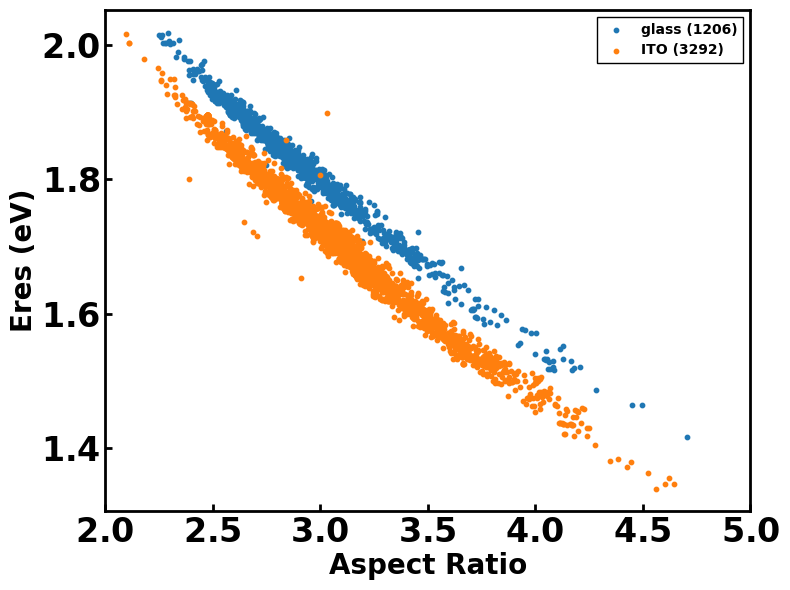

In [9]:
# Eres vs AR ITO and glass
plt.scatter(glass_data['ratio'], glass_data['eres'], s=10, label=f'glass ({glass_data.shape[0]})')
plt.scatter(ito_data['ratio'], ito_data['eres'], s=10, label=f'ITO ({ito_data.shape[0]})')

# plt.scatter(glass_data['ratio'], glass_data['eres']*conv_factor, s=10, label=f'glass ({glass_data.shape[0]})')
# plt.scatter(ito_data['ratio'], ito_data['eres'], s=10, label=f'ITO ({ito_data.shape[0]})')

plt.xlabel('Aspect Ratio')
plt.ylabel('Eres (eV)')
plt.xlim(2, 5)
plt.legend()

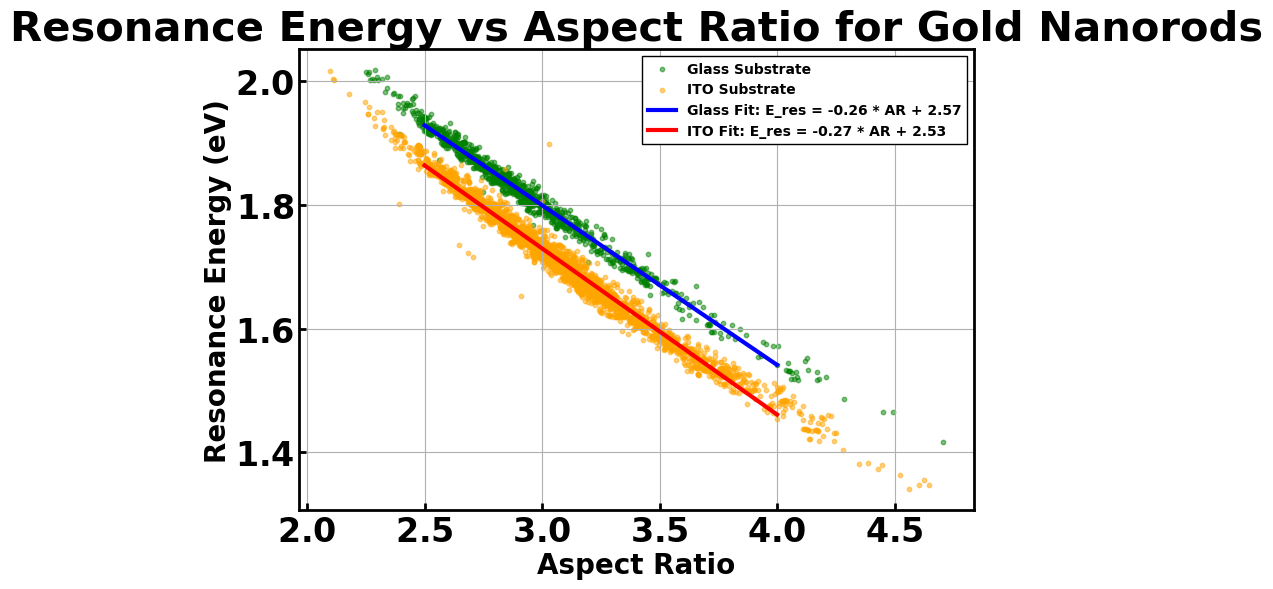

(1.799, 1.729, -0.070)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data for glass substrate
aspect_ratio_glass = glass_data['ratio']
Eres_glass = glass_data['eres']

# Data for ITO substrate
aspect_ratio_ito = ito_data['ratio']
Eres_ito = ito_data['eres']

# Define linear function
def linear_func(x, a, b):
    return a * x + b

# Fit linear function to glass data
params_glass, _ = curve_fit(linear_func, aspect_ratio_glass, Eres_glass)
a_glass, b_glass = params_glass

# Fit linear function to ITO data
params_ito, _ = curve_fit(linear_func, aspect_ratio_ito, Eres_ito)
a_ito, b_ito = params_ito

# Plot the data and the fitted lines
plt.figure(figsize=(8, 6))
plt.scatter(aspect_ratio_glass, Eres_glass, color='green', s=10, alpha=0.5, label='Glass Substrate')
plt.scatter(aspect_ratio_ito, Eres_ito, color='orange', s=10, alpha=0.5, label='ITO Substrate')

# Plot fitted lines
# x_fit = np.linspace(2.0, 4.7, 100)
x_fit = np.linspace(2.5, 4.0, 100)
plt.plot(x_fit, linear_func(x_fit, a_glass, b_glass), 'b-', label=f'Glass Fit: E_res = {a_glass:.2f} * AR + {b_glass:.2f}')
plt.plot(x_fit, linear_func(x_fit, a_ito, b_ito), 'r-', label=f'ITO Fit: E_res = {a_ito:.2f} * AR + {b_ito:.2f}')

# Add labels and legend
plt.xlabel('Aspect Ratio')
plt.ylabel('Resonance Energy (eV)')
plt.legend()
plt.title('Resonance Energy vs Aspect Ratio for Gold Nanorods')
plt.grid(True)
plt.show()

# Calculate the resonance energy shift at a specific aspect ratio
aspect_ratio_X = 3.0
E_res_glass_X = linear_func(aspect_ratio_X, a_glass, b_glass)
E_res_ito_X = linear_func(aspect_ratio_X, a_ito, b_ito)
resonance_energy_shift = E_res_ito_X - E_res_glass_X
E_res_glass_X, E_res_ito_X, resonance_energy_shift


In [19]:
import numpy as np

# Constants
omega_p = 9  # plasma frequency in eV
epsilon_inf = 9.84  # high-frequency dielectric constant
n_glass = 1.26  # effective refractive index for glass substrate
aspect_ratio = 3.0  # given aspect ratio
n_X = 1.975  # refractive index for unknown substrate

# Depolarization factor L for the given aspect ratio
L = (1 + aspect_ratio)**-1.6

# Resonance energy for glass substrate
E_res_glass = omega_p / np.sqrt(n_glass**2 / L + epsilon_inf - n_glass**2)

# Resonance energy for unknown substrate
E_res_X = omega_p / np.sqrt(n_X**2 / L + epsilon_inf - n_X**2)

# Calculate the factor F
F = E_res_X / E_res_glass

E_res_glass, E_res_X, F


(1.883, 1.392, 0.739)

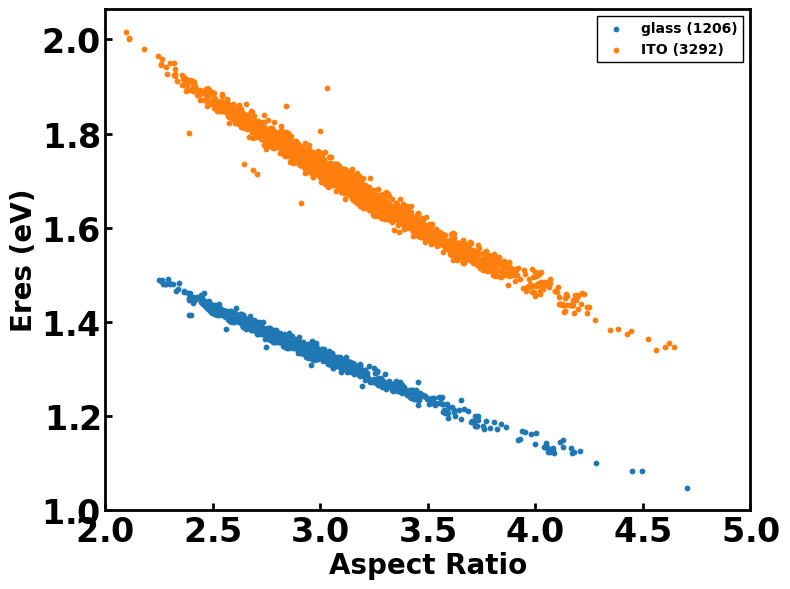

In [20]:
# Eres vs AR ITO and glass
plt.scatter(glass_data['ratio'], glass_data['eres']*F, s=10, label=f'glass ({glass_data.shape[0]})')
plt.scatter(ito_data['ratio'], ito_data['eres'], s=10, label=f'ITO ({ito_data.shape[0]})')

plt.xlabel('Aspect Ratio')
plt.ylabel('Eres (eV)')
plt.xlim(2, 5)
plt.legend()